**Overview**<br>
<a href="https://archive.ics.uci.edu/ml/datasets/online+retail">Online retail is a transnational data set</a> which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


### Steps to be done:
1. Data reading and understanding
2. Data preparation and visualisation
3. Modeling
4. Analysis


### Step 1: Reading and Understanding data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree
import warnings

warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('Online_Retail.csv', sep=',',  encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 2: Data preparation

In [6]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
round(100*(df.isna().sum() / len(df)), 2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [8]:
#we have no option other than dropping null values even if it is huge because for clustering we need custId
df = df.dropna()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [9]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
#adding column for amount
df['amount'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


#### for clustering we do segmentation based 
# R - Recency
# F - Frequency
# M - Monetary

In [11]:
# Starting with monetary
df_amount = df.groupby('CustomerID')['amount'].sum().round(2)
df_amount = df_amount.reset_index()
df_amount

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
5,12352.0,1545.41
6,12353.0,89.00
7,12354.0,1079.40
8,12355.0,459.40
9,12356.0,2811.43


In [12]:
### Frequency
df_frequency = df.groupby('CustomerID')['InvoiceNo'].count()
df_frequency = df_frequency.reset_index()
df_frequency.columns = ['CustomerID', 'frequency']
df_frequency.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [13]:
# merge both dataframe now
df_grouped = pd.merge(df_amount, df_frequency, on='CustomerID', how='inner')
df_grouped

,CustomerID,amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
5,12352.0,1545.41,95
6,12353.0,89.00,4
7,12354.0,1079.40,58
8,12355.0,459.40,13
9,12356.0,2811.43,59


In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [15]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [16]:
max_dt = df['InvoiceDate'].max()
max_dt

Timestamp('2011-12-09 12:50:00')

In [17]:
df['diff'] = max_dt - df['InvoiceDate']
df['diff'].head()

0   373 days 04:24:00
1   373 days 04:24:00
2   373 days 04:24:00
3   373 days 04:24:00
4   373 days 04:24:00
Name: diff, dtype: timedelta64[ns]

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [19]:
df_recency = df.groupby('CustomerID')['diff'].min()
df_recency = df_recency.reset_index()
df_recency.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [20]:
df_grouped = pd.merge(df_grouped, df_recency, on='CustomerID', how='inner')
df_grouped.head()

,CustomerID,amount,frequency,diff
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [21]:
df_grouped.columns = ['CustomerID', 'amount', 'frequency', 'recency']
df_grouped.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [22]:
df_grouped['recency'] = df_grouped['recency'].dt.days
df_grouped['recency'].head()

0    325
1      1
2     74
3     18
4    309
Name: recency, dtype: int64

In [23]:
df_grouped.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


#### Here, two very import steps before clustering is:
* Outlier treatement: reason is, centroids huge gets effected or shifts due to outliers 
* Scaling: this is required because variables on bug scales over-power the other feature and squared distance of such variables will be a huge value

### Two type of outliers
1. Statistical: you arbitrary choose or define the outliers based on stats like customers above 98% quartile are outliers

2. domain specific: this is defined by business 

In [24]:
#For now we are not removing any outliers, because they can be clustered in another cluster and might be useful for business

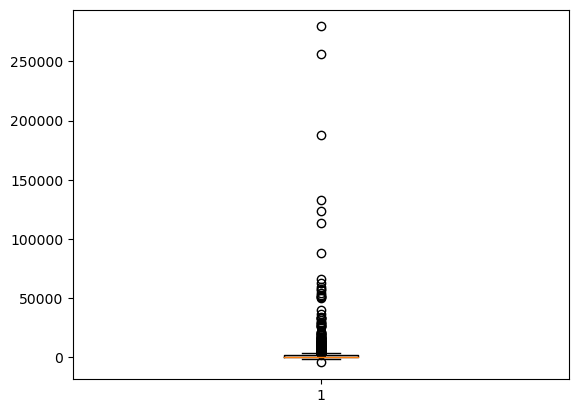

In [25]:
plt.boxplot(df_grouped.amount)
plt.show()

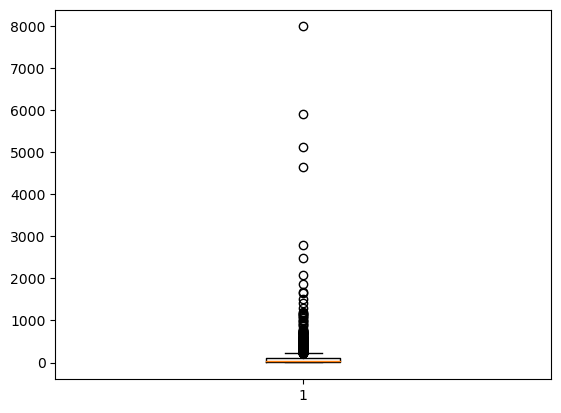

In [26]:
plt.boxplot(df_grouped.frequency)
plt.show()

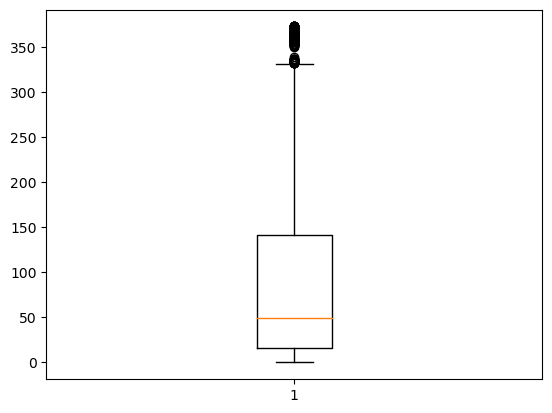

In [27]:
plt.boxplot(df_grouped.recency)
plt.show()

In [28]:
Q1 = df_grouped.amount.quantile(0.05)
Q3 = df_grouped.amount.quantile(0.95)
IQR = Q3 - Q1
print(IQR)

5523.865499999995


In [29]:
df_grouped = df_grouped[(df_grouped.amount >= Q1 - (1.5 * IQR)) & (df_grouped.amount <= Q3 + 1.5 * IQR)]
df_grouped.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [30]:
Q1 = df_grouped.frequency.quantile(0.05)
Q3 = df_grouped.frequency.quantile(0.95)
IQR = Q3 - Q1
df_grouped = df_grouped[(df_grouped.frequency >= Q1 - (1.5 * IQR)) & (df_grouped.frequency <= Q3 + 1.5 * IQR)]
df_grouped.head()


,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [31]:
Q1 = df_grouped.recency.quantile(0.05)
Q3 = df_grouped.recency.quantile(0.95)
IQR = Q3 - Q1
df_grouped = df_grouped[(df_grouped.recency >= Q1 - (1.5 * IQR)) & (df_grouped.recency <= Q3 + 1.5 * IQR)]
df_grouped.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


### Scaling the variables using Standarization

In [32]:
df_rfm = df_grouped[['recency', 'frequency', 'amount']]
df_rfm.head()

,recency,frequency,amount
0,325,2,0.00
1,1,182,4310.00
2,74,31,1797.24
3,18,73,1757.55
4,309,17,334.40


In [33]:
scaler = StandardScaler()
df_rfm_scaled = scaler.fit_transform(df_rfm)
df_rfm_scaled

array([[ 2.30161144, -0.75288754, -0.72373821],
       [-0.90646561,  1.04246665,  1.73161722],
       [-0.18365813, -0.46363604,  0.30012791],
       ...,
       [ 0.86589794, -0.70301659, -0.67769602],
       [-0.84705678, -0.64317145, -0.6231313 ],
       [-0.50050524, -0.07464263,  0.32293822]])

In [34]:
#scaler converts data in numpy array
df_rfm_scaled.shape

(4293, 3)

In [35]:
df_rfm_scaled = pd.DataFrame(df_rfm_scaled)
df_rfm_scaled.head()

,0,1,2
0,2.301611,-0.752888,-0.723738
1,-0.906466,1.042467,1.731617
2,-0.183658,-0.463636,0.300128
3,-0.738141,-0.044720,0.277517
4,2.143188,-0.603275,-0.533235


In [36]:

df_rfm_scaled.columns = ['recency', 'frequency', 'amount']
df_rfm_scaled.head()

,recency,frequency,amount
0,2.301611,-0.752888,-0.723738
1,-0.906466,1.042467,1.731617
2,-0.183658,-0.463636,0.300128
3,-0.738141,-0.044720,0.277517
4,2.143188,-0.603275,-0.533235


### Step 3: Modeling

In [37]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centroids using sampling based on
 |      an empirical probability distribution of the points' contribution to the
 |      overall inertia. This technique speeds up convergence. The algorithm
 |      implemented is "greedy k-means++". It differs from the vanilla k-means++
 |      by making several t

In [38]:
kmeans = KMeans(max_iter=50, n_clusters=4)
kmeans.fit(df_rfm_scaled)

KMeans(max_iter=50, n_clusters=4)

In [39]:
print(kmeans.labels_, 'len: ', len(kmeans.labels_))

[2 1 0 ... 2 0 0] len:  4293


In [40]:
# SSD = Sum of squared dist
#elbow curve
ssd = []

k_cluster_range = [2, 3, 4, 5, 6, 7, 8]

for num in k_cluster_range:
    
    kmeans = KMeans(max_iter=50, n_clusters=num)
    kmeans.fit(df_rfm_scaled)
    
    ssd.append(kmeans.inertia_) #inertia is nothing but squared dist
    
ssd    

[7661.705867947869,
 4433.586804662056,
 3360.717755372656,
 2802.839810511547,
 2392.3212768710387,
 2038.9700369451125,
 1826.4082063332307]

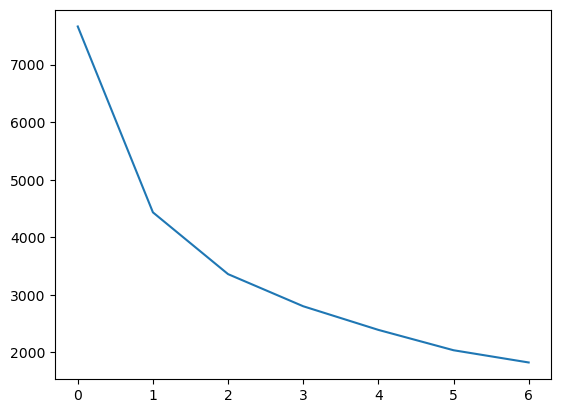

In [41]:
plt.plot(ssd)

#### here: 
* list index 0 - 2 clusers 
* list index 1 - 3 clusers
* list index 2 - 4 clusers
* list index 3 - 5 clusers
and so on...        


### Silhoutte Analysis

Generally, max silhourtte score is the best cluster numbers (K). However, most offen it depends on business 


In [42]:
k_cluster_range = [2, 3, 4, 5, 6, 7, 8]
for num in k_cluster_range:
    
    kmeans = KMeans(max_iter=50, n_clusters=num)
    kmeans.fit(df_rfm_scaled)
    
    cluster_label = kmeans.labels_
    silhoutte_avg = silhouette_score(df_rfm_scaled, cluster_label)
    print("For n_cluster: {0}, the silhoutte score is: {1}".format(num, silhoutte_avg))

For n_cluster: 2, the silhoutte score is: 0.5415858653266826
For n_cluster: 3, the silhoutte score is: 0.5084896295978492
For n_cluster: 4, the silhoutte score is: 0.4778224100166493
For n_cluster: 5, the silhoutte score is: 0.466270056429524
For n_cluster: 6, the silhoutte score is: 0.41771162185902894
For n_cluster: 7, the silhoutte score is: 0.4175084298147719
For n_cluster: 8, the silhoutte score is: 0.4076109799060024


### Step 4: Analysis

In [43]:
#final analysis

In [44]:
kmeans = KMeans(max_iter=50, n_clusters=3)
kmeans.fit(df_rfm_scaled)
print(kmeans.labels_)

[1 0 2 ... 1 2 2]


In [45]:
df_grouped['cluster_id'] = kmeans.labels_
df_grouped.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,1


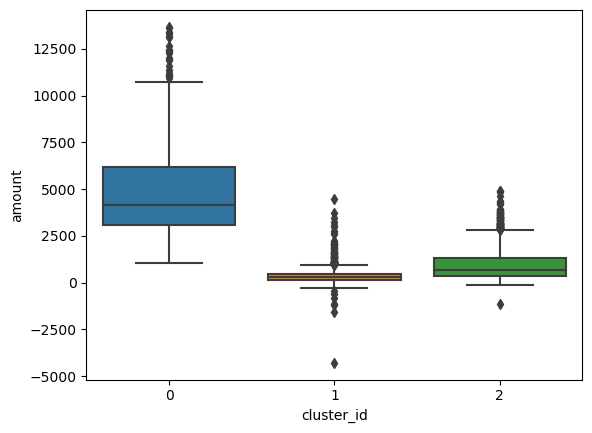

In [46]:
#lets visualise the data now
sns.boxplot(x='cluster_id', y='amount', data=df_grouped)
plt.show()

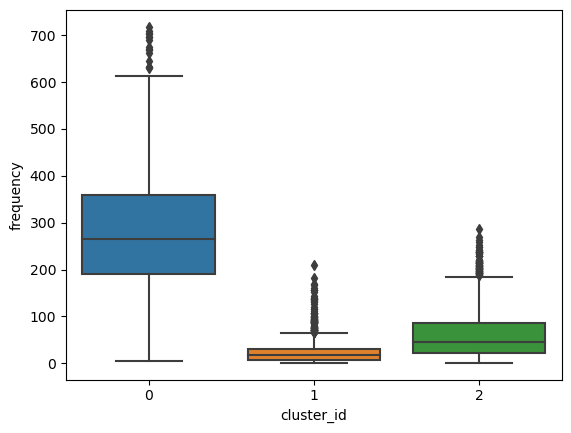

In [47]:
sns.boxplot(x='cluster_id', y='frequency', data=df_grouped)
plt.show()

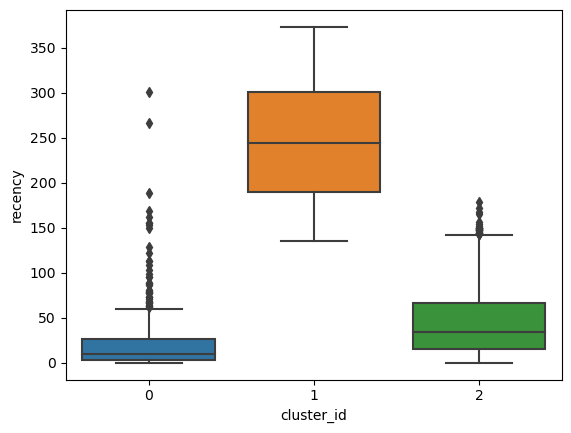

In [48]:

sns.boxplot(x='cluster_id', y='recency', data=df_grouped)
plt.show()

So, data in amount and frequency looks too skewed. Reason is outliers, hence we need to remove them. Go back to preprocessing step and treat them

### Hierarchical Clustering


In [49]:
df_grouped.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,1


In [50]:
df_rfm_scaled.head()

,recency,frequency,amount
0,2.301611,-0.752888,-0.723738
1,-0.906466,1.042467,1.731617
2,-0.183658,-0.463636,0.300128
3,-0.738141,-0.044720,0.277517
4,2.143188,-0.603275,-0.533235


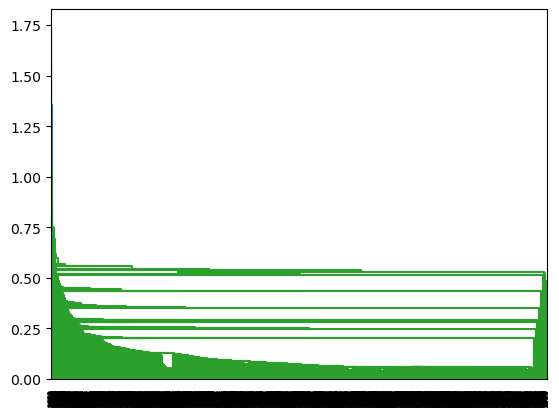

In [51]:
#Single linkage
mergings = linkage(df_rfm_scaled, method='single', metric='euclidean')
dendrogram(mergings)
plt.show()

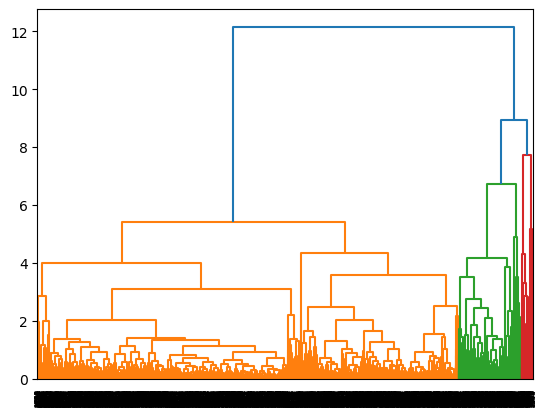

In [52]:
#Complete linkage
mergings = linkage(df_rfm_scaled, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

In [53]:
c_tree = cut_tree(mergings, n_clusters=3)
c_tree

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [54]:
print(c_tree.shape)

(4293, 1)


In [55]:
#we want our data in the form of (4293, ), so that we can merge  
c_tree = c_tree.reshape(-1, )

In [56]:
c_tree.shape

(4293,)

In [57]:
df_grouped['Cluster_id_hi'] = c_tree
df_grouped.head()

,CustomerID,amount,frequency,recency,cluster_id,Cluster_id_hi
0,12346.0,0.00,2,325,1,0
1,12347.0,4310.00,182,1,0,1
2,12348.0,1797.24,31,74,2,0
3,12349.0,1757.55,73,18,2,0
4,12350.0,334.40,17,309,1,0


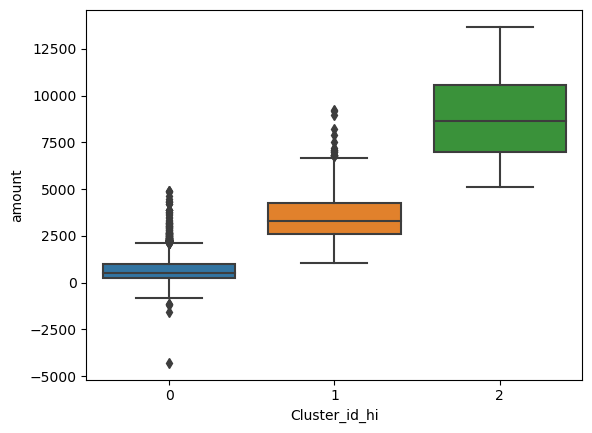

In [59]:
#lets visualise the data now
sns.boxplot(x='Cluster_id_hi', y='amount', data=df_grouped)
plt.show()

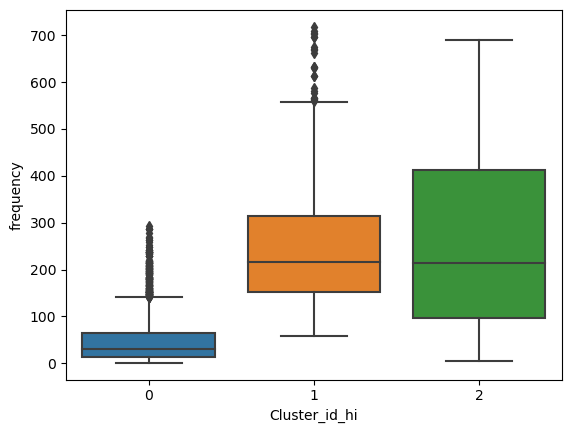

In [60]:
sns.boxplot(x='Cluster_id_hi', y='frequency', data=df_grouped)
plt.show()

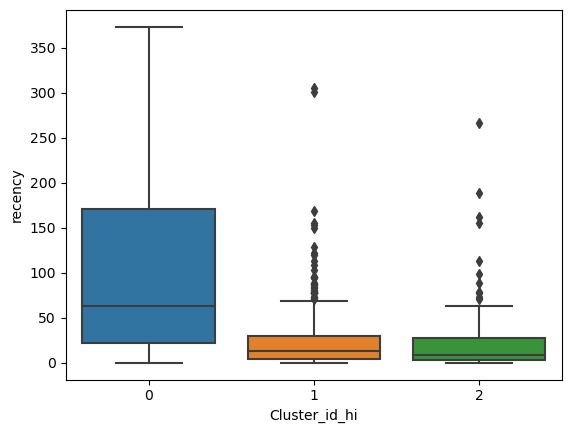

In [61]:

sns.boxplot(x='Cluster_id_hi', y='recency', data=df_grouped)
plt.show()